In [290]:
import pandas as pd
import numpy as np
import matplotlib
data = pd.read_csv('GiaChungCu.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GIỐNG - LOẠI        1950 non-null   object 
 1   GIỐNG - NHU CẦU     1950 non-null   object 
 2   GIỐNG - TỈNH THÀNH  1950 non-null   object 
 3   QUẬN HUYỆN          1950 non-null   object 
 4   GIÁ - TRIỆU ĐỒNG    1950 non-null   float64
 5   DIỆN TÍCH - M2      1948 non-null   float64
 6   HƯỚNG               658 non-null    object 
 7   SỐ TẦNG             0 non-null      float64
 8   SỐ PHÒNG            1945 non-null   float64
 9   SỐ TOILETS          1895 non-null   float64
 10  GIẤY TỜ PHÁP LÝ     1462 non-null   object 
dtypes: float64(5), object(6)
memory usage: 167.7+ KB


In [291]:
data.shape

(1950, 11)

In [292]:
data.columns

Index(['GIỐNG - LOẠI', 'GIỐNG - NHU CẦU', 'GIỐNG - TỈNH THÀNH', 'QUẬN HUYỆN',
       'GIÁ - TRIỆU ĐỒNG', 'DIỆN TÍCH - M2', 'HƯỚNG', 'SỐ TẦNG', 'SỐ PHÒNG',
       'SỐ TOILETS', 'GIẤY TỜ PHÁP LÝ'],
      dtype='object')

In [293]:
for column in data.columns:
    print(column)
    print(len(data[column].unique()))

GIỐNG - LOẠI
1
GIỐNG - NHU CẦU
1
GIỐNG - TỈNH THÀNH
1
QUẬN HUYỆN
22
GIÁ - TRIỆU ĐỒNG
473
DIỆN TÍCH - M2
300
HƯỚNG
9
SỐ TẦNG
1
SỐ PHÒNG
9
SỐ TOILETS
7
GIẤY TỜ PHÁP LÝ
4


In [294]:
data.drop(columns=['GIỐNG - LOẠI','GIỐNG - NHU CẦU','GIỐNG - TỈNH THÀNH','SỐ TẦNG'],inplace=True)
data.head()

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,NaN,2.0,2.0,Đã có sổ
1,Quận Tân Bình,3970.0,74.1,NaN,2.0,2.0,Đang chờ sổ
2,Quận 9,678.0,46.5,Tây,1.0,1.0,Đang chờ sổ
3,Quận Tân Phú,2870.0,65.0,NaN,2.0,2.0,NaN
4,Quận 9,3000.0,70.0,Đông Bắc,2.0,2.0,Đã có sổ


In [295]:
data.isnull().sum()

QUẬN HUYỆN             0
GIÁ - TRIỆU ĐỒNG       0
DIỆN TÍCH - M2         2
HƯỚNG               1292
SỐ PHÒNG               5
SỐ TOILETS            55
GIẤY TỜ PHÁP LÝ      488
dtype: int64

In [296]:
for column in ['HƯỚNG','SỐ PHÒNG','SỐ TOILETS','GIẤY TỜ PHÁP LÝ']:
    print(column)
    print(data[column].unique())

HƯỚNG
[nan 'Tây' 'Đông Bắc' 'Nam' 'Tây Bắc' 'Bắc' 'Tây Nam' 'Đông Nam' 'Đông']
SỐ PHÒNG
[ 2.  1.  3.  4.  8.  6.  7. nan  5.]
SỐ TOILETS
[ 2.  1. nan  5.  3.  4.  6.]
GIẤY TỜ PHÁP LÝ
['Đã có sổ' 'Đang chờ sổ' nan 'Giấy tờ khác']


In [297]:
data['HƯỚNG'].fillna('Không',inplace=True)
data['SỐ PHÒNG'].fillna(int(data['SỐ PHÒNG'].mean()),inplace=True)
data['SỐ TOILETS'].fillna(int(data['SỐ TOILETS'].mean()),inplace=True)
data['GIẤY TỜ PHÁP LÝ'].fillna('Không',inplace=True)
data.isnull().sum()

QUẬN HUYỆN          0
GIÁ - TRIỆU ĐỒNG    0
DIỆN TÍCH - M2      2
HƯỚNG               0
SỐ PHÒNG            0
SỐ TOILETS          0
GIẤY TỜ PHÁP LÝ     0
dtype: int64

In [298]:
for i in range(len(data)):
    if str(data.loc[i,'DIỆN TÍCH - M2']) =='nan':
        data.drop(i,inplace=True)
data=data.reset_index(drop=True)
data.isnull().sum()

QUẬN HUYỆN          0
GIÁ - TRIỆU ĐỒNG    0
DIỆN TÍCH - M2      0
HƯỚNG               0
SỐ PHÒNG            0
SỐ TOILETS          0
GIẤY TỜ PHÁP LÝ     0
dtype: int64

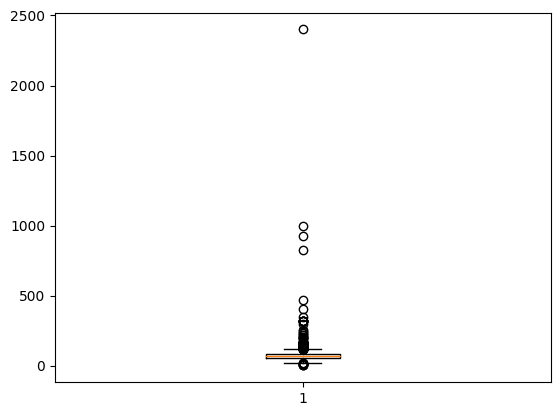

In [299]:
import matplotlib.pyplot as plt
plt.boxplot(data["DIỆN TÍCH - M2"])
plt.show()

Kiểm tra các dòng dữ liệu vô lý

In [300]:
x=data[data['DIỆN TÍCH - M2'] <= data['DIỆN TÍCH - M2'].quantile(0.0015)]
print(len(x))
x.head(10)

3


,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
880,Quận 8,1050.0,2.5,Tây,1.0,1.0,Đã có sổ
920,Quận Tân Bình,3400.0,6.0,Không,2.0,2.0,Đã có sổ
1061,Quận Bình Thạnh,100.0,1.0,Không,1.0,1.0,Đã có sổ


In [301]:
x=data[data['DIỆN TÍCH - M2'] >= data['DIỆN TÍCH - M2'].quantile(0.998)]
print(len(x))
x.head(10)

4


,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
69,Quận 9,4300.0,1000.0,Đông Nam,2.0,2.0,Đã có sổ
265,Quận 7,150000.0,825.0,Không,2.0,1.0,Đã có sổ
1341,Quận 12,120000.0,928.6,Không,2.0,1.0,Đã có sổ
1498,Quận Bình Tân,55000.0,2400.0,Đông Nam,8.0,1.0,Đã có sổ


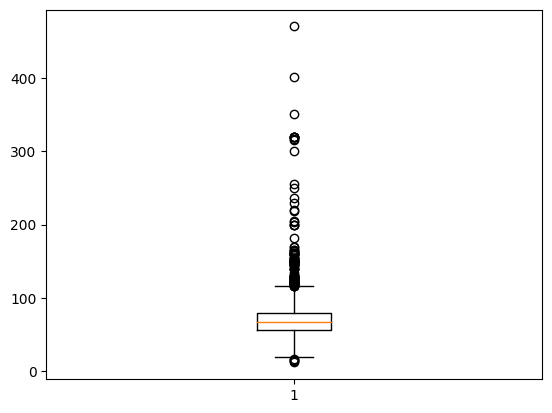

In [302]:
data=data[data['DIỆN TÍCH - M2'] > data['DIỆN TÍCH - M2'].quantile(0.0015)]
data=data.reset_index(drop=True)
data=data[data['DIỆN TÍCH - M2'] < data['DIỆN TÍCH - M2'].quantile(0.998)]
data=data.reset_index(drop=True)
plt.boxplot(data["DIỆN TÍCH - M2"])
plt.show()

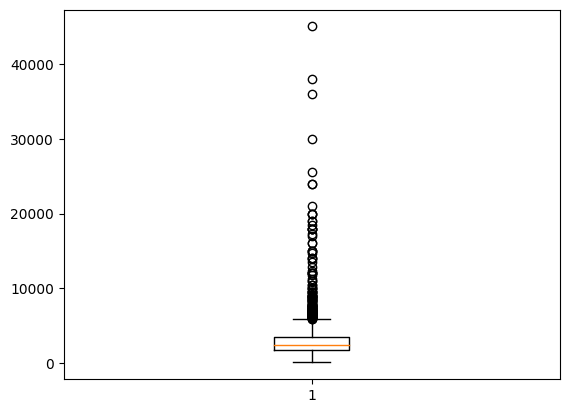

In [303]:
plt.boxplot(data["GIÁ - TRIỆU ĐỒNG"])
plt.show()

Kiểm tra dòng có diện tích bé mà giá rất cao

In [304]:
data[(data['DIỆN TÍCH - M2'] <= data['DIỆN TÍCH - M2'].quantile(0.1))&(data['GIÁ - TRIỆU ĐỒNG'] >= data['GIÁ - TRIỆU ĐỒNG'].quantile(0.9))]

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
437,Quận 1,38000.0,16.0,Đông,1.0,1.0,Đã có sổ
579,Quận 1,15000.0,41.0,Không,1.0,1.0,Giấy tờ khác
1453,Quận Phú Nhuận,9000.0,24.0,Không,2.0,3.0,Đã có sổ


In [305]:
data.drop(index=437,inplace=True)
data=data.reset_index(drop=True)

In [306]:
data_temp=data.copy()

In [307]:
quan=data.groupby(['QUẬN HUYỆN'])
data['Lower Bound'] = quan['GIÁ - TRIỆU ĐỒNG'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
data['Upper Bound'] = quan['GIÁ - TRIỆU ĐỒNG'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
data.head(3)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ,Lower Bound,Upper Bound
0,Quận 9,2650.0,69.0,Không,2.0,2.0,Đã có sổ,197.5,3865.5
1,Quận Tân Bình,3970.0,74.1,Không,2.0,2.0,Đang chờ sổ,-2552.5,6827.5
2,Quận 9,678.0,46.5,Tây,1.0,1.0,Đang chờ sổ,197.5,3865.5


In [308]:
x=data.shape[0]
print(data.shape)
data = data[(data['GIÁ - TRIỆU ĐỒNG'] >= data['Lower Bound']) & (data['GIÁ - TRIỆU ĐỒNG'] <= data['Upper Bound'])]
data = data.drop(['Lower Bound', 'Upper Bound'], axis=1)
data=data.reset_index(drop=True)
print(data.shape)
print('Sub: ',x-data.shape[0])

(1940, 9)
(1836, 7)
Sub:  104


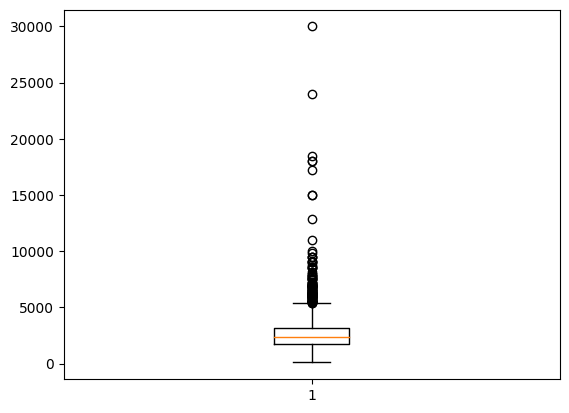

In [309]:
plt.boxplot(data["GIÁ - TRIỆU ĐỒNG"])
plt.show()

Dữ liệu sạch tiến hành lưu vào file mới

In [310]:
data.to_csv('ChungCuTinhChinh2.csv')

### Train data

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [311]:
data=pd.read_csv('ChungCuTinhChinh2.csv')
data.head()

,Unnamed: 0,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,0,Quận 9,2650.0,69.0,Không,2.0,2.0,Đã có sổ
1,1,Quận Tân Bình,3970.0,74.1,Không,2.0,2.0,Đang chờ sổ
2,2,Quận 9,678.0,46.5,Tây,1.0,1.0,Đang chờ sổ
3,3,Quận Tân Phú,2870.0,65.0,Không,2.0,2.0,Không
4,4,Quận 9,3000.0,70.0,Đông Bắc,2.0,2.0,Đã có sổ


In [312]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [313]:
for column in data.columns:
    print(column)
    print(len(data[column].unique()))

QUẬN HUYỆN
22
GIÁ - TRIỆU ĐỒNG
433
DIỆN TÍCH - M2
257
HƯỚNG
9
SỐ PHÒNG
8
SỐ TOILETS
5
GIẤY TỜ PHÁP LÝ
4


In [315]:
data.describe()

,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS
count,1836.000000,1836.000000,1836.000000,1836.000000
mean,2745.975927,68.890226,1.988562,1.686819
std,1861.551209,22.067945,0.624111,0.535864
min,100.000000,12.200000,1.000000,1.000000
25%,1750.000000,56.000000,2.000000,1.000000
50%,2350.000000,67.000000,2.000000,2.000000
75%,3200.000000,77.000000,2.000000,2.000000
max,30000.000000,250.000000,8.000000,5.000000


Vì trong dự án không có số toilets nên xóa cột số toilets đi

In [ ]:
data.drop(columns=['SỐ TOILETS'],inplace=True)
data.head(1)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,Không,2.0,Đã có sổ


Hàm xếp hạng dictionary

In [ ]:
import math
import pandas as pd
def create_rank_feature(x):
    temp_dict={}
    for i in range(len(x)):
        min=math.inf
        flat=0
        temp_key=None
        for key in x.keys():
            if key not in temp_dict.keys() and x[key] < min:
                min=x[key]
                temp_key=key
                flat=1
        temp_dict[temp_key]=[i,min]
    return temp_dict


Tính toán giá nhà trung bình của từng giá trị theo cột

In [ ]:
quan={}
huong={}
giayto={}
for value in data['QUẬN HUYỆN'].unique():
    quan[value]=data[data['QUẬN HUYỆN']==value]['GIÁ - TRIỆU ĐỒNG'].mean()
for value in data['HƯỚNG'].unique():
    huong[value]=data[data['HƯỚNG']==value]['GIÁ - TRIỆU ĐỒNG'].mean()
for value in data['GIẤY TỜ PHÁP LÝ'].unique():
    giayto[value]=data[data['GIẤY TỜ PHÁP LÝ']==value]['GIÁ - TRIỆU ĐỒNG'].mean()
print(quan)
print(huong)
print(giayto)

{'Quận 9': 1961.797876013158, 'Quận Tân Bình': 2381.179, 'Quận Tân Phú': 2815.672473548387, 'Quận 7': 2831.86802071066, 'Quận 2': 3785.4754222222223, 'Quận 11': 2833.6363636363635, 'Quận Thủ Đức': 1920.458064516129, 'Huyện Bình Chánh': 1803.7894736842106, 'Quận Bình Tân': 1967.5096153846155, 'Quận 12': 1861.2588235294118, 'Quận 5': 3362.6666666666665, 'Quận 8': 2135.232522033898, 'Quận Phú Nhuận': 4703.5526315789475, 'Huyện Nhà Bè': 2503.2203389830506, 'Quận 6': 2571.633333333333, 'Quận Bình Thạnh': 3804.678943192307, 'Quận 10': 4575.475, 'Quận Gò Vấp': 2421.3888888888887, 'Quận 4': 4210.816326530612, 'Quận 1': 10168.56590909091, 'Quận 3': 2836.923076923077, 'Huyện Hóc Môn': 2726.6666666666665}
{'Không': 2746.808594126634, 'Tây': 2427.7361111111113, 'Đông Bắc': 3363.138386666667, 'Nam': 2575.8067536231883, 'Tây Bắc': 2674.3947368421054, 'Bắc': 2555.2280701754385, 'Tây Nam': 3086.0851063829787, 'Đông Nam': 2574.279981583333, 'Đông': 2869.0723819047616}
{'Đã có sổ': 2690.5905153255426, '

Uớc tính bước nhảy

In [ ]:
count_arr={}
for column in data.columns:
    print(column,len(data[column].unique()))
    count_arr[column]=round(1/len(data[column].unique()),4)
print(count_arr)

QUẬN HUYỆN 22
GIÁ - TRIỆU ĐỒNG 433
DIỆN TÍCH - M2 257
HƯỚNG 9
SỐ PHÒNG 8
GIẤY TỜ PHÁP LÝ 4
{'QUẬN HUYỆN': 0.0455, 'GIÁ - TRIỆU ĐỒNG': 0.0023, 'DIỆN TÍCH - M2': 0.0039, 'HƯỚNG': 0.1111, 'SỐ PHÒNG': 0.125, 'GIẤY TỜ PHÁP LÝ': 0.25}


In [ ]:
quan=create_rank_feature(quan)
huong=create_rank_feature(huong)
giayto=create_rank_feature(giayto)
print(quan)
print(huong)
print(giayto)

{'Huyện Bình Chánh': [0, 1803.7894736842106], 'Quận 12': [1, 1861.2588235294118], 'Quận Thủ Đức': [2, 1920.458064516129], 'Quận 9': [3, 1961.797876013158], 'Quận Bình Tân': [4, 1967.5096153846155], 'Quận 8': [5, 2135.232522033898], 'Quận Tân Bình': [6, 2381.179], 'Quận Gò Vấp': [7, 2421.3888888888887], 'Huyện Nhà Bè': [8, 2503.2203389830506], 'Quận 6': [9, 2571.633333333333], 'Huyện Hóc Môn': [10, 2726.6666666666665], 'Quận Tân Phú': [11, 2815.672473548387], 'Quận 7': [12, 2831.86802071066], 'Quận 11': [13, 2833.6363636363635], 'Quận 3': [14, 2836.923076923077], 'Quận 5': [15, 3362.6666666666665], 'Quận 2': [16, 3785.4754222222223], 'Quận Bình Thạnh': [17, 3804.678943192307], 'Quận 4': [18, 4210.816326530612], 'Quận 10': [19, 4575.475], 'Quận Phú Nhuận': [20, 4703.5526315789475], 'Quận 1': [21, 10168.56590909091]}
{'Tây': [0, 2427.7361111111113], 'Bắc': [1, 2555.2280701754385], 'Đông Nam': [2, 2574.279981583333], 'Nam': [3, 2575.8067536231883], 'Tây Bắc': [4, 2674.3947368421054], 'Khôn

Các chuyển đổi hoàn chỉnh

In [ ]:
count_quan=count_arr['QUẬN HUYỆN']
count_huong=count_arr['HƯỚNG']
count_giayto=count_arr['GIẤY TỜ PHÁP LÝ']
for key in quan.keys():
    quan[key]=count_quan
    count_quan=round(count_quan+count_arr['QUẬN HUYỆN'],4)
for key in huong.keys():
    huong[key]=count_huong
    count_huong=round(count_huong+count_arr['HƯỚNG'],4)
for key in giayto.keys():
    giayto[key]=count_giayto
    count_giayto=round(count_giayto+count_arr['GIẤY TỜ PHÁP LÝ'],4)
print(quan)
print(huong)
print(giayto)

{'Huyện Bình Chánh': 0.0455, 'Quận 12': 0.091, 'Quận Thủ Đức': 0.1365, 'Quận 9': 0.182, 'Quận Bình Tân': 0.2275, 'Quận 8': 0.273, 'Quận Tân Bình': 0.3185, 'Quận Gò Vấp': 0.364, 'Huyện Nhà Bè': 0.4095, 'Quận 6': 0.455, 'Huyện Hóc Môn': 0.5005, 'Quận Tân Phú': 0.546, 'Quận 7': 0.5915, 'Quận 11': 0.637, 'Quận 3': 0.6825, 'Quận 5': 0.728, 'Quận 2': 0.7735, 'Quận Bình Thạnh': 0.819, 'Quận 4': 0.8645, 'Quận 10': 0.91, 'Quận Phú Nhuận': 0.9555, 'Quận 1': 1.001}
{'Tây': 0.1111, 'Bắc': 0.2222, 'Đông Nam': 0.3333, 'Nam': 0.4444, 'Tây Bắc': 0.5555, 'Không': 0.6666, 'Đông': 0.7777, 'Tây Nam': 0.8888, 'Đông Bắc': 0.9999}
{'Giấy tờ khác': 0.25, 'Không': 0.5, 'Đã có sổ': 0.75, 'Đang chờ sổ': 1.0}


In [ ]:
data['QUẬN HUYỆN']=data['QUẬN HUYỆN'].apply(lambda x: quan[str(x)])
data['GIẤY TỜ PHÁP LÝ']=data['GIẤY TỜ PHÁP LÝ'].apply(lambda x: giayto[str(x)])
data['HƯỚNG']=data['HƯỚNG'].apply(lambda x: huong[str(x)])

In [ ]:
data.head(5)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,GIẤY TỜ PHÁP LÝ
0,0.1820,2650.0,69.0,0.6666,2.0,0.75
1,0.3185,3970.0,74.1,0.6666,2.0,1.00
2,0.1820,678.0,46.5,0.1111,1.0,1.00
3,0.5460,2870.0,65.0,0.6666,2.0,0.50
4,0.1820,3000.0,70.0,0.9999,2.0,0.75


In [ ]:
data.corr()

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ PHÒNG,GIẤY TỜ PHÁP LÝ
QUẬN HUYỆN,1.000000,0.507273,0.236392,0.058428,0.093870,0.043187
GIÁ - TRIỆU ĐỒNG,0.507273,1.000000,0.495842,0.078497,0.327797,0.065914
DIỆN TÍCH - M2,0.236392,0.495842,1.000000,0.010112,0.727009,0.023821
HƯỚNG,0.058428,0.078497,0.010112,1.000000,0.017129,-0.028727
SỐ PHÒNG,0.093870,0.327797,0.727009,0.017129,1.000000,0.020908
GIẤY TỜ PHÁP LÝ,0.043187,0.065914,0.023821,-0.028727,0.020908,1.000000


Bắt đầu train mô hình

In [ ]:
X = data.drop("GIÁ - TRIỆU ĐỒNG", axis=1)
y = data["GIÁ - TRIỆU ĐỒNG"]
print(X.shape)
print(y.shape)

(1836, 5)
(1836,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Các hàm đánh giá

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lin_reg.intercept_)

-1251.6904456697234


In [ ]:
pred = lin_reg.predict(X_test)
print(pred)

[2696.82045457 3631.56397049 2827.65116314 2554.07192559 2353.17324394
 2602.62605807 2638.57626522  852.58587428 2268.49817383 3903.16931102
 3604.19623371 2818.35588083 4247.01480409 1615.88881386 3356.86361053
 1756.66523613 3244.35637629 2620.27391556 2173.82001564 4583.4729073
 3910.99889456 1858.25013789 3869.17898484 3648.20233894 3259.66869651
 2974.05337674 1963.42955956 1458.31503825 1489.13817721 2079.8080952
 2004.86390041 3818.25032967 3910.98308818 4167.49756998 2676.75829669
 2573.96335299 3380.25474382 2259.16132351 2749.86703022 1601.66653612
 3457.32427447 1686.59726306 2886.1094413  3903.16931102 2258.75074257
 2976.79417664 1625.36690991 1588.09468977 1636.60725423 1558.36918205
 1261.08584759 3980.12822128  704.35079776 3547.05963087 2479.28519479
 2473.87170196 2834.82566321 1823.48015026 2639.00265253 3112.65355875
 3210.32911907 1784.9132995   985.13208734 1363.86498492 1317.93924164
 2729.14858985 2514.66810659 1431.6185454  1413.65671131 4281.9555222
 3494.681

Kiểm tra có dự đoán âm không

In [ ]:
print(pred[pred<0])

[]


Kiểm tra kết quả min max

In [ ]:
import math
max=-math.inf
j=-1
for i in range(len(pred)):
    if pred[i]>max:
        max=pred[i]
        j=i
print(max)
print(j)

7929.577599817509
301


In [ ]:
print(X_test.iloc[j],y_test.iloc[j])

QUẬN HUYỆN           0.7735
DIỆN TÍCH - M2     200.0000
HƯỚNG                0.6666
SỐ PHÒNG             4.0000
GIẤY TỜ PHÁP LÝ      0.7500
Name: 344, dtype: float64 8500.0


In [ ]:

min=math.inf
j2=-1
for i in range(len(pred)):
    if pred[i]<min:
        min=pred[i]
        j2=i
print(min)
print(j2)

470.0876587089631
176


In [ ]:
print(X_test.iloc[j2],y_test.iloc[j2])

QUẬN HUYỆN          0.0455
DIỆN TÍCH - M2     46.0000
HƯỚNG               0.1111
SỐ PHÒNG            1.0000
GIẤY TỜ PHÁP LÝ     0.2500
Name: 1328, dtype: float64 550.0


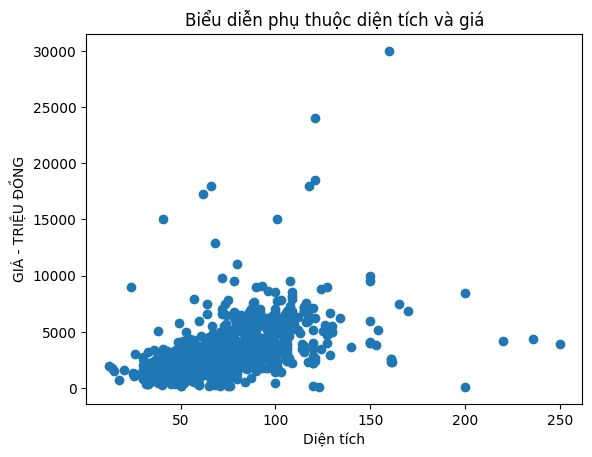

In [ ]:
target_name='GIÁ - TRIỆU ĐỒNG'
plt.scatter(data['DIỆN TÍCH - M2'], data[target_name])
plt.xlabel('Diện tích')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc diện tích và giá')
plt.show()

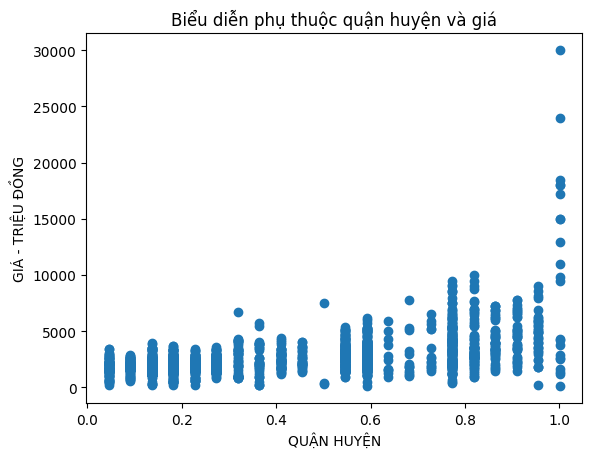

In [ ]:
target_name='GIÁ - TRIỆU ĐỒNG'
plt.scatter(data['QUẬN HUYỆN'], data[target_name])
plt.xlabel('QUẬN HUYỆN')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc quận huyện và giá')
plt.show()

có thể thấy giá chung cư phụ thuộc rất nhiều từ diện tích, quận huyện tiếp theo là số phòng

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 739.7808532482271
MSE: 961129.8838518282
RMSE: 980.372318995099
R2 Square 0.5925694101603862
__________________________________
Train set evaluation:
_____________________________________
MAE: 818.4096173306269
MSE: 2313658.144260918
RMSE: 1521.0713803963697
R2 Square 0.38143247175774564
__________________________________


Text(0, 0.5, 'true')

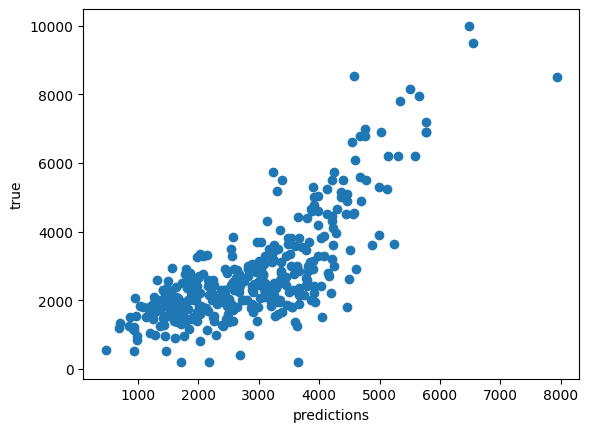

In [ ]:
plt.scatter(pred, y_test)
plt.xlabel('predictions')
plt.ylabel('true')

Giá dự đoán ổn trong khoảng giá gốc là 10 tỷ

Lưu mô hình

In [ ]:
import pickle
pickle.dump(lin_reg,open('lin_reg_CC_perfect2.pkl','wb'))